In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns

# Parte 1

In [9]:
data = pd.read_csv("manzanas.csv")

## 1.1  Análisis exploratorio

In [10]:
data.head()

ID    Tamaño      Peso   Dulzura   Textura   Humedad   Madurez    Acidez  \
0   0 -3.970049 -2.512336  5.346330 -1.012009  1.844900  0.329840 -0.491590   
1   1 -1.195217 -2.839257  3.664059  1.588232  0.853286  0.867530 -0.722809   
2   2 -0.292024 -1.351282 -1.738429 -0.342616  2.838636 -0.038033  2.621636   
3   3 -0.657196 -2.271627  1.324874 -0.097875  3.637970 -3.413761  0.790723   
4   4  1.364217 -1.296612 -0.384658 -0.553006  3.030874 -1.303849  0.501984   

  Calidad  
0   buena  
1   buena  
2    mala  
3   buena  
4   buena

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       4000 non-null   int64  
 1   Tamaño   4000 non-null   float64
 2   Peso     4000 non-null   float64
 3   Dulzura  4000 non-null   float64
 4   Textura  4000 non-null   float64
 5   Humedad  4000 non-null   float64
 6   Madurez  4000 non-null   float64
 7   Acidez   4000 non-null   float64
 8   Calidad  4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [12]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.3 Gráficos exploratorios

### Tamaño vs peso

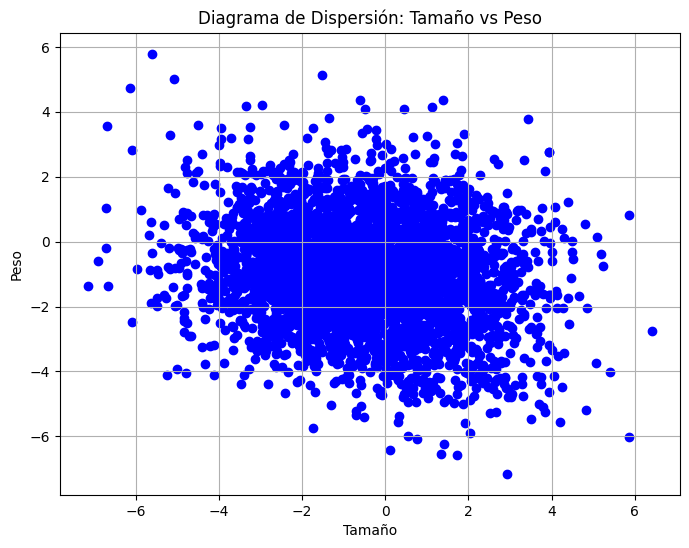

In [14]:
# Tamaño vs peso
plt.figure(figsize=(8, 6))
plt.scatter(data['Tamaño'], data['Peso'], color='blue')
plt.title('Diagrama de Dispersión: Tamaño vs Peso')
plt.xlabel('Tamaño')
plt.ylabel('Peso')
plt.grid(True)
plt.show()

### Distribución de variables

c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_ol

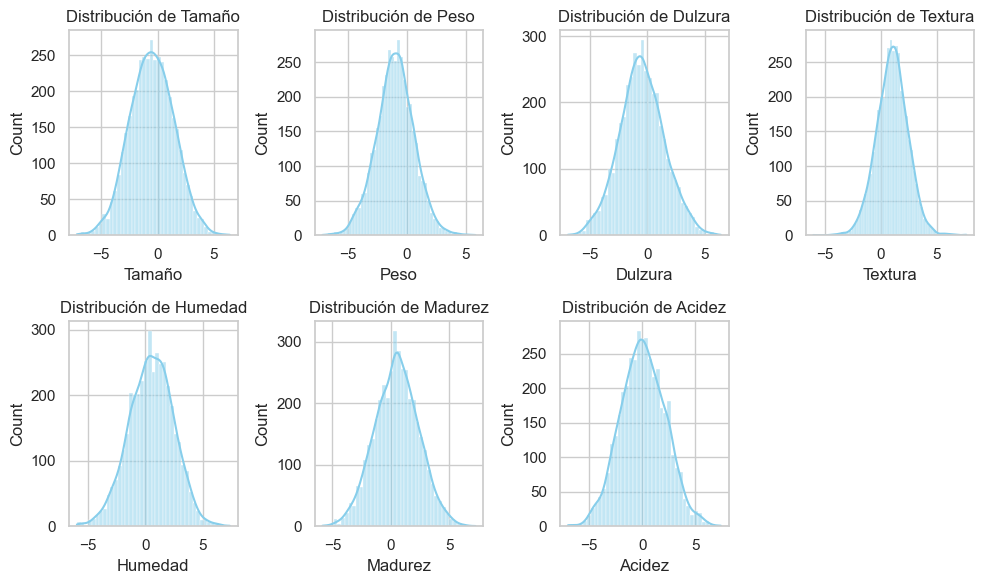

In [15]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64'])

# Configurar el estilo y los ajustes de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas numéricas y crear histogramas y gráficos de densidad
for i, columna in enumerate(columnas_numericas.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=data, x=columna, kde=True, color='skyblue')
    plt.title(f'Distribución de {columna}')

plt.tight_layout()
plt.show()

### Caja y Bigotes

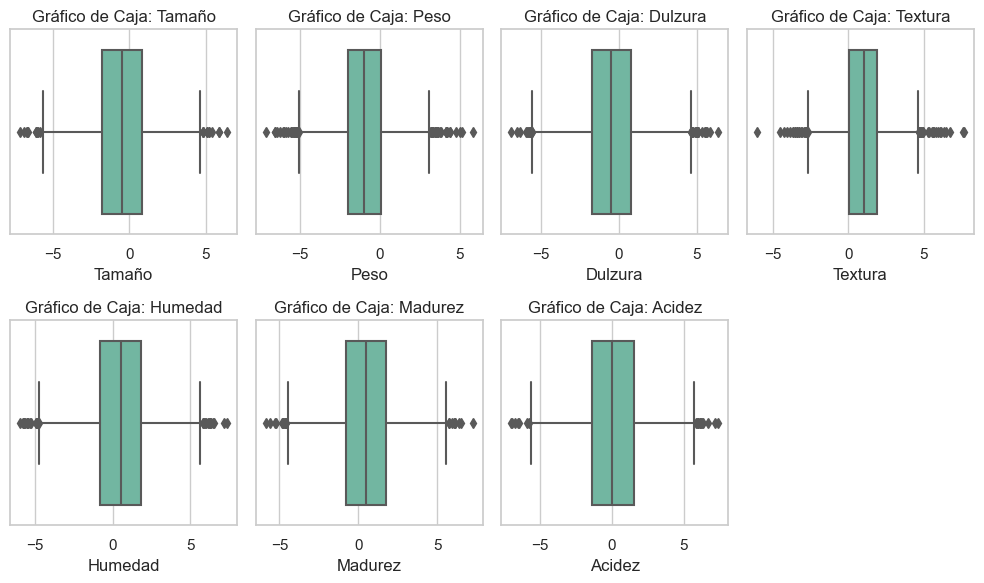

In [16]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['float64'])

# Configurar el estilo y los ajustes de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas numéricas y crear gráficos de caja y bigotes
for i, columna in enumerate(columnas_numericas.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=columna, data=data, palette="Set2")
    plt.title(f'Gráfico de Caja: {columna}')

plt.tight_layout()
plt.show()

## 1.4 Análisis de correlación

In [19]:
# 1.4

# Calcular la matriz de correlación de pearson
correlation_matrix = data.loc[:,["Tamaño","Peso","Dulzura","Textura","Humedad","Madurez","Acidez"]].corr(method='pearson')
correlation_matrix

Tamaño      Peso   Dulzura   Textura   Humedad   Madurez    Acidez
Tamaño   1.000000 -0.170702 -0.324680  0.169868 -0.018892 -0.134773  0.196218
Peso    -0.170702  1.000000 -0.154246 -0.095882 -0.092263 -0.243824  0.016414
Dulzura -0.324680 -0.154246  1.000000 -0.037552  0.095882 -0.273800  0.085999
Textura  0.169868 -0.095882 -0.037552  1.000000 -0.259607 -0.201982  0.069943
Humedad -0.018892 -0.092263  0.095882 -0.259607  1.000000 -0.097144  0.248714
Madurez -0.134773 -0.243824 -0.273800 -0.201982 -0.097144  1.000000 -0.202669
Acidez   0.196218  0.016414  0.085999  0.069943  0.248714 -0.202669  1.000000

## 1.5 Tablas de frecuencia

Calidad
buena    2004
mala     1996
Name: count, dtype: int64


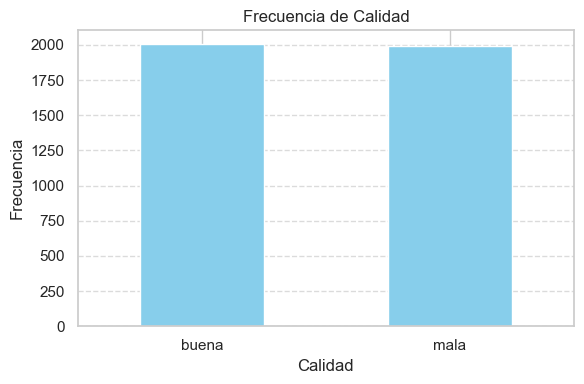

In [23]:
# 1.5

frecuencia_calidad = data['Calidad'].value_counts()
print(frecuencia_calidad)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
frecuencia_calidad.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Calidad')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para una mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 1.6 Limpieza de datos

In [17]:
# 1.6
data = data.drop(columns=['ID'])
# Eliminar nan, pues estos son menos del 0.1% del conjunto de datos
data = data.dropna()
data.head()

Tamaño      Peso   Dulzura   Textura   Humedad   Madurez    Acidez  \
0 -3.970049 -2.512336  5.346330 -1.012009  1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257  3.664059  1.588232  0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282 -1.738429 -0.342616  2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627  1.324874 -0.097875  3.637970 -3.413761  0.790723   
4  1.364217 -1.296612 -0.384658 -0.553006  3.030874 -1.303849  0.501984   

  Calidad  
0   buena  
1   buena  
2    mala  
3   buena  
4   buena

# Parte 2

### Reemplazar calidad "buena" por 1 y "mala" por 1

In [18]:
data['Calidad'] = data['Calidad'].replace({'buena': 0, 'mala': 1}).infer_objects()
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Separación de conjuntos de datos

In [19]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Normalizado de datos

In [20]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

from sklearn.metrics import confusion_matrix, accuracy_score

## Regresión logística

In [21]:
from sklearn.linear_model import LogisticRegression
clasif_reg_log = LogisticRegression(random_state = 0)
clasif_reg_log.fit(X_entreno, y_entreno)

LogisticRegression(random_state=0)

In [22]:
# Predecir datos de prueba
y_pred = clasif_reg_log.predict(X_prueba)

### Matriz de confusión y accuracy

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
matconf = confusion_matrix(y_prueba, y_pred)
print(len(y_prueba), len(y_pred))
print(matconf)
accuracy_score(y_prueba, y_pred)

1000 1000
[[367 127]
 [146 360]]


0.727

## Modelo KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
modelo = KNeighborsClassifier()
malla_parametros = {'n_neighbors':[1, 2, 5, 10, 13, 14, 15, 16, 17, 20, 25, 30, 50, 100, 1000]}
malla = GridSearchCV(modelo, malla_parametros)

malla.fit(X_entreno, y_entreno)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 5, 10, 13, 14, 15, 16, 17, 20,
                                         25, 30, 50, 100, 1000]})

In [ ]:
best_params = malla.best_params_
best_score = malla.best_score_

print(best_params)
print(best_score)

{'n_neighbors': 15}
0.899


### Modelo con n=15

In [25]:
clasif_knn = KNeighborsClassifier(n_neighbors = 15)
clasif_knn.fit(X_entreno, y_entreno)

KNeighborsClassifier(n_neighbors=15)

In [26]:
# Predecir datos de prueba
y_pred = clasif_knn.predict(X_prueba)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
matconf = confusion_matrix(y_prueba, y_pred)
print(len(y_prueba), len(y_pred))
print(matconf)
accuracy_score(y_prueba, y_pred)

1000 1000
[[447  47]
 [ 68 438]]


0.885

## SVM

In [41]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

from sklearn.svm import SVC
clasificador = SVC(kernel = 'linear', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

y_pred = clasificador.predict(X_prueba)

mat_conf = confusion_matrix(y_prueba, y_pred)
print(mat_conf)
accuracy_score(y_prueba, y_pred)

[[375 119]
 [152 354]]


0.729

## Kernel SVM

In [ ]:
from sklearn.svm import SVC

### Grid search

In [ ]:
svm = SVC()
malla_parametros = {'C':[0.01, 0.1, 0.5, 1, 5, 10],'kernel':['rbf', 'sigmoid', 'poly'], 'gamma': [0.01, 0.1, 1, 10]}
malla = GridSearchCV(svm, malla_parametros)
malla.fit(X_entreno, y_entreno)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10],
                         'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']})

In [ ]:
best_params = malla.best_params_
best_score = malla.best_score_

print(best_params)
print(best_score)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9116666666666667


### Modelo SVM kernel=rbf c=1 gamma=1

In [ ]:

clasif_svc_k = SVC(kernel = 'rbf', C=1, gamma=1, random_state = 0)
clasif_svc_k.fit(X_entreno, y_entreno)

SVC(C=1, gamma=1, random_state=0)

In [ ]:
# Predecir datos de prueba
y_pred = clasif_svc_k.predict(X_prueba)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
matconf = confusion_matrix(y_prueba, y_pred)
print(len(y_prueba), len(y_pred))
print(matconf)
accuracy_score(y_prueba, y_pred)

1000 1000
[[453  41]
 [ 67 439]]


0.892

## Naive Bayes

In [42]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
clasificador = GaussianNB()
clasificador.fit(X_entreno, y_entreno)

y_predicciones = clasificador.predict(X_prueba)

mat_conf = confusion_matrix(y_prueba, y_predicciones)
print(mat_conf)
accuracy_score(y_prueba, y_predicciones)

[[374 120]
 [139 367]]


0.741

## Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

clasif_desition_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clasif_desition_tree.fit(X_entreno, y_entreno)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predecir datos de prueba
y_pred = clasif_desition_tree.predict(X_prueba)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
matconf = confusion_matrix(y_prueba, y_pred)
print(len(y_prueba), len(y_pred))
print(matconf)
accuracy_score(y_prueba, y_pred)

1000 1000
[[392 102]
 [109 397]]


0.789

In [ ]:
# Accuracy con gini: 0.776
# Accuracy con log_loss: 0.789
# Accuracy con entropy: 0.789

## Random Forest

In [ ]:
# Random Forest (Con grid search)

# Encontrando los mejores parámetros con grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

n_estimators = [10, 25, 50, 75, 100, 200, 500, 1000]


modelo = RandomForestClassifier()
malla_parametros = {'n_estimators': n_estimators, 'max_features' : ['sqrt', 'log2'], }

malla = GridSearchCV(modelo, malla_parametros)

malla.fit(X_entreno, y_entreno)

best_params = malla.best_params_
best_score = malla.best_score_

print(best_params)
print(best_score)

{'max_features': 'log2', 'n_estimators': 100}
0.892


In [37]:

clasificador = RandomForestClassifier(n_estimators = 100, max_features= 'log2')
clasificador.fit(X_entreno, y_entreno)


y_predicciones = clasificador.predict(X_prueba)
mat_conf = confusion_matrix(y_prueba, y_predicciones)
print(mat_conf)
accuracy_score(y_prueba, y_predicciones)

[[440  54]
 [ 75 431]]


0.871